In [1]:
#
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from PIL import Image
%matplotlib inline

# Make sure that caffe is on the python path:
caffe_root = '../../'  # this file is expected to be in {caffe_root}/examples
import sys
sys.path.insert(0, caffe_root + 'python')

import caffe
plt.rcParams.update({'font.size': 7})

caffe.set_mode_gpu()
caffe.set_device(0)

In [2]:
def draw_positions(layers, net, gg, l):    
    colors = ['r','g','b','k','c']
    #colors = ['ro','go','bo','ko','co','rs','gs','bs','ks','cs']
    c = 0
    nn = len(layers)
    wd = 3
    ht = 3

    plt.figure(figsize=(2*wd,2*wd*ht))    
    for layer in layers:        
        ax1 = plt.subplot(ht*wd,wd,1+c)
        
        if len(net.params[layer])<3:  
            x = [0,-1,-1,-1,0,0,1,1,1]
            y = [0,0,1,-1,-1,1,-1,0,1]
            for i in range(8):
                plt.plot([x[0], x[i+1]], [y[0], y[i+1]],'k')
                plt.scatter([x[0], x[i+1]], [y[0], y[i+1]],marker='.',color='k')
            
        else:            
            [groups,n,h,w] = net.params[layer][2].data.shape
            if gg!=-1:
                groups = 1
            for g in range(groups):
                if gg!=-1:
                    g=gg

                x = net.params[layer][2].data[g,:].flatten() 
                y = net.params[layer][3].data[g,:].flatten()
                
                
                cc=g%5
                
                plt.scatter(x[0], y[0],marker='.',color=colors[cc])
                
                for i in range(x.size-1):
                    
                    plt.plot([x[0], x[i+1]], [y[0], y[i+1]],colors[cc],alpha=1)                    
                    plt.scatter(x[i+1], y[i+1],marker='.',color=colors[cc])
        
        stepsize = 1
        
        ll = round(l)
        ax1.yaxis.set_ticks(np.arange(-ll, ll+1, stepsize))         
        ax1.xaxis.set_ticks(np.arange(-ll, ll+1, stepsize))         
        plt.title(layer)
        plt.xlim(-l,l)
        plt.ylim(-l,l)        
        plt.grid(True)
        c = c+1        
    
    
    plt.subplots_adjust(wspace=0.3, hspace = 0.3)
    
    

#### Set parameters

In [10]:
path = 'ACU'
netName = 'plain'
iter_ = '64000'

layers = ['conv1_1/1','conv1_1/2', 'conv2_1/1','conv2_1/2', 'conv3_1/1','conv3_1/2']

#### Load model

In [11]:
net = []
net = caffe.Net('[' + netName + ']deploy.prototxt',
                netName +'_iter_' + iter_ +'.caffemodel',
                caffe.TRAIN)

#### Draw Positions

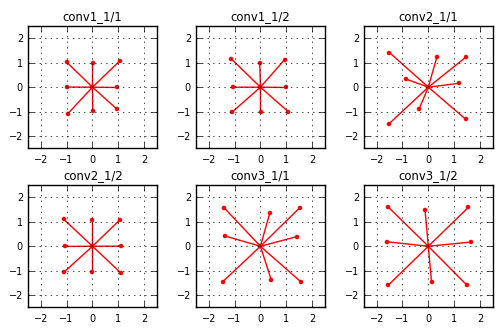

In [12]:
draw_positions(layers, net, -1,2.5)